In [1]:
#IMPORTS 
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\EmilR\Documents\GitHub\MoleculeSim\ownSim")

import forces as fc
import molecules as mc
import random
import copy

In [9]:
samples = 100
# function to yield energies and step acceptance for different distances between 2 molecules
def test_step_acceptance(mol1,mol2, universe):
  e_current = mc.get_energy(mol1, universe)
  inter = mc.inter_dist(mol1,mol2)
  print(inter)
  dists = np.linspace(0.1,inter, samples) # evenly spaced distances between
  delta_moves = [(mol2.pos - mol1.pos) - np.array([0.,0.,mol2.radius]) - np.array([0.,0.,mol1.radius]) - np.array([0.,0.,dist]) for dist in dists][::-1]
  print(delta_moves)
  energies = []
  accepts = []
  for move in delta_moves:  
      mol_copy = copy.deepcopy(mol1)
      #print(type(move[0]))
      #print(type(mol1.pos[0]))
      mol_copy.move(move)

      #calculate energy for potential new location
      e_new = mc.get_energy(mol1, universe, mol_copy)

      # if move is accepted, make the real molecule perform the step
      accepted = fc.accept_move(e_current,e_new, mc.BETA)

      energies.append(e_new)
      accepts.append(accepted)
  
  return e_current, energies, accepts

In [10]:
#define universe
box_const_size = 500
box_size = np.array([box_const_size,box_const_size,box_const_size]) #max coordinate values for universe
num_molecules = 2
seed = 1313

# create 2 mole universe
mol1, mol2 = mc.Molecule(np.array([100.,100.,100.]), 100.), mc.Molecule(np.array([100.,100.,325.]), 100.)
uni = mc.SimpleUniverse(box_size, num_molecules,[],seed,own_molecules=[mol1,mol2])

# get metrics
e_current, energy, accepts = test_step_acceptance(mol1,mol2, uni)

25.0
[array([0., 0., 0.]), array([0.        , 0.        , 0.25151515]), array([0.       , 0.       , 0.5030303]), array([0.        , 0.        , 0.75454545]), array([0.        , 0.        , 1.00606061]), array([0.        , 0.        , 1.25757576]), array([0.        , 0.        , 1.50909091]), array([0.        , 0.        , 1.76060606]), array([0.        , 0.        , 2.01212121]), array([0.        , 0.        , 2.26363636]), array([0.        , 0.        , 2.51515152]), array([0.        , 0.        , 2.76666667]), array([0.        , 0.        , 3.01818182]), array([0.        , 0.        , 3.26969697]), array([0.        , 0.        , 3.52121212]), array([0.        , 0.        , 3.77272727]), array([0.        , 0.        , 4.02424242]), array([0.        , 0.        , 4.27575758]), array([0.        , 0.        , 4.52727273]), array([0.        , 0.        , 4.77878788]), array([0.        , 0.        , 5.03030303]), array([0.        , 0.        , 5.28181818]), array([0.        , 0.        , 

(100,)


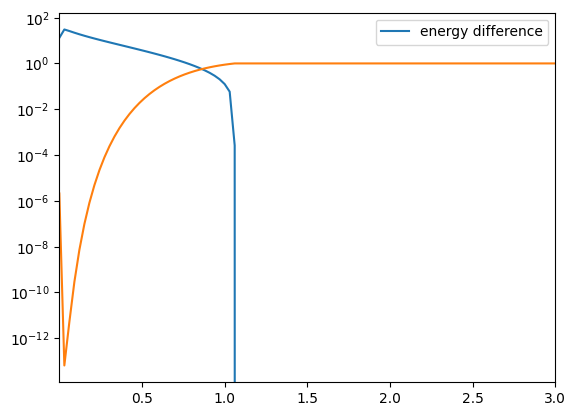

In [19]:
x = np.linspace(0.00001,3, 100)
print(x.shape)
plt.figure()
#plt.plot(x, energy)
plt.plot(x, (energy-e_current)[::-1], label = "energy difference")
plt.plot(x, [get_prob(e_current,e,1) for e in energy][::-1],label = "move probability")
plt.yscale("log")
plt.xlim([0.00001,3])
plt.legend()
plt.show()

In [ ]:
print(uni.molecules[0].pos)
print(uni.molecules[1].pos)

[100. 100. 100.]
[100. 100. 325.]


In [ ]:
orces = fc.total_force_molecule(mol1,mol2)
# ep = mc.get_energy(mol1, uni)
print(forces)
# print(ep)
# mol1.move(np.array([0,0,23]))

# forces = fc.total_force_molecule(mol1,mol2)
# ep = mc.get_energy(mol1, uni)
# print(forces)
# print(ep)






NameError: name 'forces' is not defined

In [ ]:
#Plot relationship between interdistance and energy
inter = mc.inter_dist(mol1,mol2)
#print(inter)
dists = np.linspace(0.1,inter, samples)
#print(dists)
acc_rate = [get_acc(e_current,e, mc.BETA) for e in energy]
print(acc_rate)
# plt.figure()
# #plt.plot(dists,acc_rate, label = "acceptance probability for given distance")
# plt.plot(dists, energy, label = "Energy for given distance")
# plt.xlim([0,25])
# plt.legend()
# plt.show()


[1.0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\EmilR\AppData\Local\Temp\ipykernel_35380\3307302905.py:5: RuntimeWarning: overflow encountered in exp
  prob = np.exp(-Beta*(eNew- ePrev))


In [ ]:
forces = fc.total_force_molecule(mol1,mol2)
# ep = mc.get_energy(mol1, uni)
# print(forces)
# print(ep)
# mol1.move(np.array([0,0,23]))

# forces = fc.total_force_molecule(mol1,mol2)
# ep = mc.get_energy(mol1, uni)
# print(forces)
# print(ep)


In [ ]:
print(uni.molecules[0].pos)
print(uni.molecules[1].pos)
print(mol1.pos)
print(mol2.pos)

[100. 100. 100.]
[100. 100. 325.]
[100. 100. 100.]
[100. 100. 325.]


In [ ]:
def pls_work(mol_fixed, mol_moved, universe): #compute the energy of all molecules with respect to
  idx = universe.molecules.index(mol_fixed)
  nbs = [m for m in universe.molecules]
  del nbs[idx]
  energy = sum([fc.total_force_molecule(mol_moved,m2) for m2 in nbs])
  return energy

In [ ]:
m1_copy = copy.deepcopy(mol1)

# x = pls_work(mol1,m1_copy, uni)
# print(x)

m1_copy.move(np.array([0.,0.,23.]))
x = pls_work(mol1,m1_copy, uni)
print(x)

11.25565253970488
